# 1. Population and Sample

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create a Population DataFrame with 10 data 

data = pd.DataFrame()
data['Population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]

# Draw 5 samples with/without replacement, size=5 from Population
a_sample_with_replacement = data['Population'].sample(5, replace=True)   # might draw one sample many times
print(a_sample_with_replacement)                                         # left column is index, right column is population

a_sample_without_replacement = data['Population'].sample(5, replace=False)  # only draw each sample once
print(a_sample_without_replacement)                                         # left column is index, right column is population

4    19
5    13
9    60
9    60
9    60
Name: Population, dtype: int64
5    13
1    48
3    20
7    16
6    72
Name: Population, dtype: int64


# 2. Statistics(mean,var, degree of freedom)

In [3]:
# Calculate mean and variance
population_mean = data['Population'].mean()
# ddof: “Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, where N represents the number of elements.
population_var1 = data['Population'].var(ddof=0)    # denominator is N
population_var2 = data['Population'].var(ddof=1)    # denominator is N-1

print('Population mean is ', population_mean)
print('Population variance ddof =0 is', population_var1)  
print('Population variance ddof =1 is', population_var2)

n = data['Population'].size                         # calculate the variance according to the formula
sample_difference=[(data['Population'][i]-population_mean)**2 for i in range(n)]
var3 = sum(sample_difference)/(n)
range_list = []
for i in range(n):
    range_list.append(i)   
#print('number of samples', n)
#print('index of the samples range(10):', range_list)
print('manually calculated variance is', var3)

# Average of an unbiased estimator
# randomly draw 10 sample 500 times and compute the average
sample_length = 500
sample_variance_collection=[data['Population'].sample(10, replace=True).var(ddof=1) for i in range(sample_length)]
sample_variance_collection[0:5]

Population mean is  43.0
Population variance ddof =0 is 571.8
Population variance ddof =1 is 635.3333333333334
manually calculated variance is 571.8


[530.9333333333334,
 784.7222222222222,
 350.67777777777775,
 704.7222222222222,
 552.7222222222222]

# 3.1 Random draw samples based on normal distribution

In [4]:
# Sample mean and SD keep changing, but always within a certain range
Fstsample = pd.DataFrame(np.random.normal(10, 5, size=100))   # random draw a sample based on normal distr.
print('sample mean is ', Fstsample[0].mean())                # Fstsample[0] is Fstsample itself.
print('sample SD is ', Fstsample[0].std(ddof=1))

sample mean is  10.208873470919881
sample SD is  4.7335830955897364


# 3.2 Empirical Distribution of mean

C:\Users\YI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


mean of meanlist  9.993661971938419


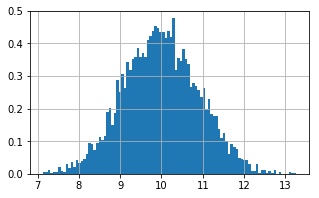

In [5]:
meanlist = []
for t in range(5000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30))
    meanlist.append(sample[0].mean())                              # Fstsample[0] is Fstsample itself.

collection = pd.DataFrame()
collection['meanlist'] = meanlist
collection['meanlist'].hist(bins=100, normed=1,figsize=(5,3))

print('mean of meanlist ', sum(meanlist)/len(meanlist))           # mean() is not used for list type        

# 3.3 Sampling from arbritary distribution (central limit theorem)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017B20856978>]],
      dtype=object)

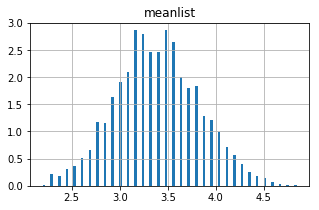

In [6]:
# the sample size is larger enough, the distribution of sample mean is approximately normal
# apop is not normal, but try to change the sample size from 100 to a larger number. The distribution of sample mean of apop 
# becomes normal.
sample_size = 50
samplemeanlist = []
apop =  pd.DataFrame([1, 5, 1, 9, 1])                   # Random number list
for t in range(2000):
    sample = apop[0].sample(sample_size, replace=True)  # from apop select 50 samples
    samplemeanlist.append(sample.mean())
    
acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist                    # list cannot be used to plot hist
acollec.hist(bins=100, normed=1,figsize=(5,3))

# 4. Confidence Interval
### Estimate the average stock return with 90% Confidence Interval

In [7]:
ms = pd.read_csv('C:/Users/YI/Desktop/Coursera/Python Statistics Finance/microsoft.csv',index_col ='Date') # index is date
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [8]:
# we will use log return for average stock return of Microsoft
ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])

# Lets build 90% confidence interval for log return
sample_size = ms['logReturn'].shape[0]                         # equivalent: sample_size = ms['logReturn'].size
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1) / (sample_size**0.5)    # for interval

# left and right quantile ==========> left + (1-right) = 1 - Confidence Interval
z_left = norm.ppf(0.05)
z_right = norm.ppf(0.95)
# upper and lower bound
interval_left = sample_mean + z_left*sample_std
interval_right = sample_mean + z_right*sample_std

# 90% confidence interval tells you that there will be 90% chance that the average stock return lies between "interval_left"
# and "interval_right".
print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (-1.560325389937862e-05, 0.001656066226145423)


# 4. Hypothesis testing

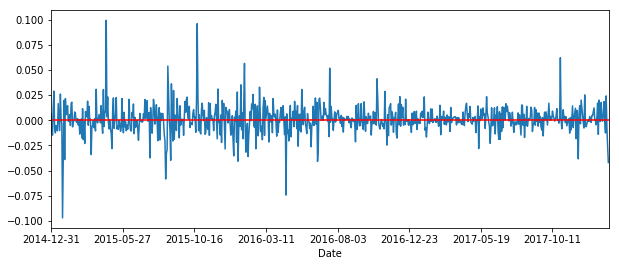

In [9]:
# import microsoft.csv, and add a new feature - logreturn
# Log return goes up and down during the period
ms['logReturn'].plot(figsize=(10, 4))
plt.axhline(0, color='red')
plt.show()

## 4.1 Steps involved in testing a claim by hypothesis testing, two-tails test

### Step 1: Set hypothesis
$H_0 : \mu = 0$ 
$H_a : \mu \neq 0$

H0 means the average stock return is 0,
H1 means the average stock return is not equal to 0

### Step 2: Calculate test statistic

In [25]:
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

1.6141477140003675


### Step 3: Set decision criteria

In [26]:
# confidence level
alpha = 0.05
zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft  # z-distribution is symmetric 
print(zleft, zright)

-1.9599639845400545 1.9599639845400545


### Step 4:  Make decision - shall we reject H0?

In [27]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, shall we reject: False


## 4.2 Another hyporthesis testing, one tail test
$H_0 : \mu \leq 0$ 
$H_a : \mu > 0$

In [34]:
# step 2
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0]
# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = zhat = (sample_mean - 0)/(sample_std/n**0.5)
print('zhat is:', zhat)

# step 3
alpha = 0.05
zright = norm.ppf(1-alpha, 0, 1)
print('zright is', zright)

# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright))

zhat is: 1.6141477140003675
zright is 1.6448536269514722
At significant level of 0.05, shall we reject: False


## 4.2 An alternative method: p-value

In [36]:
# step 3 (p-value)
p = 1 - norm.cdf(zhat, 0, 1)
print('p value is:',p)
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))

p value is: 0.053247694996968464
At significant level of 0.05, shall we reject: False
